In [260]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 30)


In [261]:
# Load the AIT log data set v2

path_santos = "../AIT_LD-v2/santos"
df_auth = pd.read_csv(path_santos + "/gather/inet-firewall/logs/dnsmasq.log", header=None)
#df_auth.columns = ['date_time', 'log_provider', 'message']

# Display the first few rows of the data set
df_auth.head(2)

# Display the entries corresponding to attack (rows 144-151)
df_auth

,0
0,Jan 14 00:00:09 dnsmasq[14...
1,Jan 14 00:00:09 dnsmasq[14...
2,Jan 14 00:00:09 dnsmasq[14...
3,Jan 14 00:00:23 dnsmasq[14...
4,Jan 14 00:00:23 dnsmasq[14...
...,...
275662,Jan 17 23:44:37 dnsmasq[14...
275663,Jan 17 23:44:37 dnsmasq[14...
275664,Jan 17 23:44:37 dnsmasq[14...
275665,Jan 17 23:58:37 dnsmasq[14...


In [262]:
import json

# load labels from json line by line
auth_labels_data = []

with open(path_santos + "/labels/inet-firewall/logs/dnsmasq.log") as file:
    for line in file:
        auth_labels_data.append(json.loads(line))

# Convert to DF and display the first few rows of the data set
df_auth_labels = pd.DataFrame(auth_labels_data)

df_auth_labels

,line,labels,rules
0,1,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
1,2,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
2,3,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
3,50,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
4,51,"[dnsteal, attacker, dnstea...",{'dnsteal': ['dnsteal.doma...
...,...,...,...
39421,238062,"[webshell_cmd, escalate]",{'webshell_cmd': ['attacke...
39422,238063,"[webshell_cmd, escalate]",{'webshell_cmd': ['attacke...
39423,238064,"[webshell_cmd, escalate]",{'webshell_cmd': ['attacke...
39424,238065,"[webshell_cmd, escalate]",{'webshell_cmd': ['attacke...


In [263]:
# Add Labels and true_type to dataset (true_type = 1 for attack)
for index, row in df_auth_labels.iterrows():
    line = row['line']
    labels = row['labels']
    df_auth.loc[line-1, 'true_type'] = "1"
    df_auth.loc[line-1, 'labels'] = str(labels)

# Add true_type = 0 for normal
df_auth['true_type'] = df_auth['true_type'].replace("n", "0")

df_auth.iloc[7706:7733]


,0,true_type,labels
7706,Jan 14 06:40:48 dnsmasq[14...,0,nan
7707,Jan 14 06:40:48 dnsmasq[14...,0,nan
7708,Jan 14 06:40:51 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
7709,Jan 14 06:40:51 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
7710,Jan 14 06:40:51 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
7711,Jan 14 06:41:04 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
7712,Jan 14 06:41:04 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
7713,Jan 14 06:41:04 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
7714,Jan 14 06:41:18 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
7715,Jan 14 06:41:18 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."


In [264]:
df_auth.head()

,0,true_type,labels
0,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
1,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
2,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd..."
3,Jan 14 00:00:23 dnsmasq[14...,0,nan
4,Jan 14 00:00:23 dnsmasq[14...,0,nan


In [265]:
df_auth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275667 entries, 0 to 275666
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   0          275667 non-null  object
 1   true_type  275667 non-null  object
 2   labels     275667 non-null  object
dtypes: object(3)
memory usage: 6.3+ MB


In [266]:
df_auth.describe()

,0,true_type,labels
count,275667,275667,275667
unique,207381,2,8
top,Jan 14 11:22:17 dnsmasq[14...,0,nan
freq,53,236241,236241


In [267]:
df_auth.describe(include="object")

,0,true_type,labels
count,275667,275667,275667
unique,207381,2,8
top,Jan 14 11:22:17 dnsmasq[14...,0,nan
freq,53,236241,236241


In [268]:
df_auth.isnull().sum()

0            0
true_type    0
labels       0
dtype: int64

In [269]:
df_auth.duplicated().sum()

68286

In [270]:
#Dataset contains duplicates (around 68286 lines)
df_auth[df_auth.duplicated()]

,0,true_type,labels
11,Jan 14 00:00:23 dnsmasq[14...,0,nan
12,Jan 14 00:00:23 dnsmasq[14...,0,nan
13,Jan 14 00:00:23 dnsmasq[14...,0,nan
14,Jan 14 00:00:23 dnsmasq[14...,0,nan
18,Jan 14 00:00:23 dnsmasq[14...,0,nan
...,...,...,...
275644,Jan 17 23:39:13 dnsmasq[14...,0,nan
275645,Jan 17 23:39:13 dnsmasq[14...,0,nan
275653,Jan 17 23:39:13 dnsmasq[14...,0,nan
275654,Jan 17 23:39:13 dnsmasq[14...,0,nan


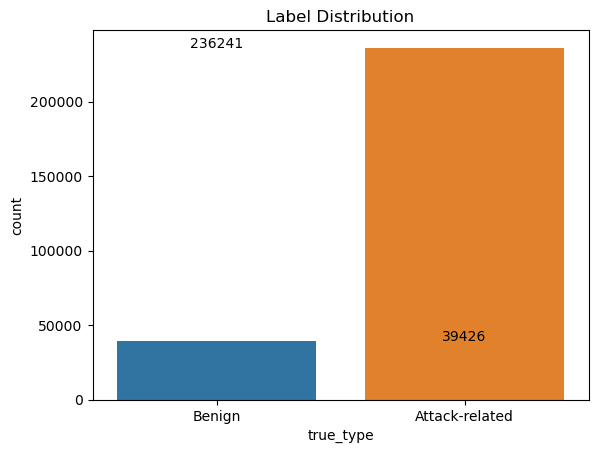

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_auth['true_type'])
plt.title("Label Distribution")
plt.xticks(ticks=[0,1], labels=['Benign', 'Attack-related'])

for i in range(2):
    count = df_auth['true_type'].value_counts().values[i]
    plt.text(i, count, str(count), ha = 'center')
plt.show()

In [272]:
one_log_message = df_auth[0][0]

one_log_message = one_log_message.split(" dnsmasq[14919]: ")[0]

one_log_message

'Jan 14 00:00:09'

In [273]:
#Rename column name
df_auth.columns = ['raw', 'true_type', 'labels']

In [286]:
import re

def split_string(x, sep, split_part):
    # Use re.split to split the string based on the pattern
    split_parts = re.split(sep, x)
    # Return the first part (before the pattern)
    return split_parts[split_part]

# Apply the function to the 'raw' column and assign the result to 'date_time' column
df_auth["date_time"] = df_auth['raw'].apply(split_string, sep=r' dnsmasq\[\d+\]: ', split_part=0)
df_auth["msg_type"] = df_auth['raw'].apply(split_string, sep=r' dnsmasq\[\d+\]: ', split_part=1).apply(split_string, sep=' ', split_part=0)
df_auth

,raw,true_type,labels,date_time,msg_type
0,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd...",Jan 14 00:00:09,query[A]
1,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd...",Jan 14 00:00:09,forwarded
2,Jan 14 00:00:09 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd...",Jan 14 00:00:09,reply
3,Jan 14 00:00:23 dnsmasq[14...,0,nan,Jan 14 00:00:23,query[SRV]
4,Jan 14 00:00:23 dnsmasq[14...,0,nan,Jan 14 00:00:23,forwarded
...,...,...,...,...,...
275662,Jan 17 23:44:37 dnsmasq[14...,0,nan,Jan 17 23:44:37,reply
275663,Jan 17 23:44:37 dnsmasq[14...,0,nan,Jan 17 23:44:37,reply
275664,Jan 17 23:44:37 dnsmasq[14...,0,nan,Jan 17 23:44:37,reply
275665,Jan 17 23:58:37 dnsmasq[14...,0,nan,Jan 17 23:58:37,query[AAAA]


In [289]:

df_auth.iloc[66127:66129]


,raw,true_type,labels,date_time,msg_type
66127,Jan 14 18:07:08 dnsmasq[14...,0,nan,Jan 14 18:07:08,reply
66128,Jan 14 18:07:16 dnsmasq[14...,1,"['dnsteal', 'attacker', 'd...",Jan 14 18:07:16,query[A]
